In [1]:
import os 
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import function_plot as f_plt

In [2]:
z='72'
work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_bc03MILES_100k/'
idx_file=work_dir+'sandage_varZ_v4.1_m72fix_noburst_100k_spec_dcombnull_idx_001.fits'
par_file=work_dir+'sandage_varZ_v4.1_m72fix_noburst_100k_spec_dcombnull_001_physpar_wagef.fits'

In [3]:
hdul_idx=fits.open(idx_file)
hdul_par=fits.open(par_file)

d4000n=hdul_idx[1].data['D4000N'][...,4]
hdhg=hdul_idx[1].data['HdHg'][...,4]
Hb=hdul_idx[1].data['Lick_Hb'][...,4]
mg2fe=hdul_idx[1].data['Mg2Fe'][...,4]
mgfep=hdul_idx[1].data['MgFe_prime'][...,4]

mag_u=hdul_par[1].data['ABMAG'][...,0]
mag_g=hdul_par[1].data['ABMAG'][...,1]
mag_r=hdul_par[1].data['ABMAG'][...,2]
mag_i=hdul_par[1].data['ABMAG'][...,3]
mag_z=hdul_par[1].data['ABMAG'][...,4]

age10=hdul_par[1].data['age10']
age25=hdul_par[1].data['age25']
age50=hdul_par[1].data['age50']
age75=hdul_par[1].data['age75']
age90=hdul_par[1].data['age90']



In [4]:
n_chunks=5
for i_chunks in range(2, n_chunks+1):
    _idx_file=work_dir+'sandage_varZ_v4.1_m72fix_noburst_100k_spec_dcombnull_idx_{:03d}.fits'
    _par_file=work_dir+'sandage_varZ_v4.1_m72fix_noburst_100k_spec_dcombnull_{:03d}_physpar_wagef.fits'
    
    _hdul_idx=fits.open(_idx_file.format(i_chunks))
    _hdul_par=fits.open(_par_file.format(i_chunks))

    _d4000n=_hdul_idx[1].data['D4000N'][...,4]
    _hdhg=_hdul_idx[1].data['HdHg'][...,4]
    _Hb=_hdul_idx[1].data['Lick_Hb'][...,4]
    _mg2fe=_hdul_idx[1].data['Mg2Fe'][...,4]
    _mgfep=_hdul_idx[1].data['MgFe_prime'][...,4]

    _mag_u=_hdul_par[1].data['ABMAG'][...,0]
    _mag_g=_hdul_par[1].data['ABMAG'][...,1]
    _mag_r=_hdul_par[1].data['ABMAG'][...,2]
    _mag_i=_hdul_par[1].data['ABMAG'][...,3]
    _mag_z=_hdul_par[1].data['ABMAG'][...,4]

    _age10=_hdul_par[1].data['age10']
    _age25=_hdul_par[1].data['age25']
    _age50=_hdul_par[1].data['age50']
    _age75=_hdul_par[1].data['age75']
    _age90=_hdul_par[1].data['age90']
    
    d4000n=np.append(d4000n, _d4000n)
    hdhg=np.append(hdhg, _hdhg)
    Hb=np.append(Hb, _Hb)
    mg2fe=np.append(mg2fe, _mg2fe)
    mgfep=np.append(mgfep, _mgfep)
    
    mag_u=np.append(mag_u, _mag_u)
    mag_g=np.append(mag_g, _mag_g)
    mag_r=np.append(mag_r, _mag_r)
    mag_i=np.append(mag_i, _mag_i)
    mag_z=np.append(mag_z, _mag_z)
    
    age10=np.append(age10, _age10)
    age25=np.append(age25, _age25)
    age50=np.append(age50, _age50)
    age75=np.append(age75, _age75)
    age90=np.append(age90, _age90)
    
    
d1090n50=np.log10((age10-age90)/age50)

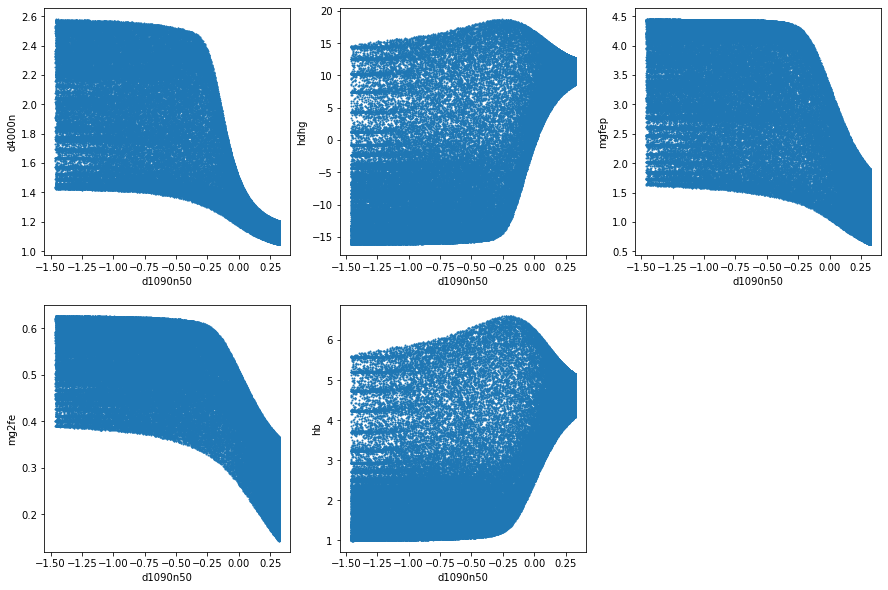

In [5]:
fig_res_tot=f_plt.idx_resol(d1090n50,d4000n,hdhg, mgfep, mg2fe, Hb, par_name='d1090n50', idx_name=['d4000n', 'hdhg', 'mgfep', 'mg2fe', 'hb'], figsize=(15,10))

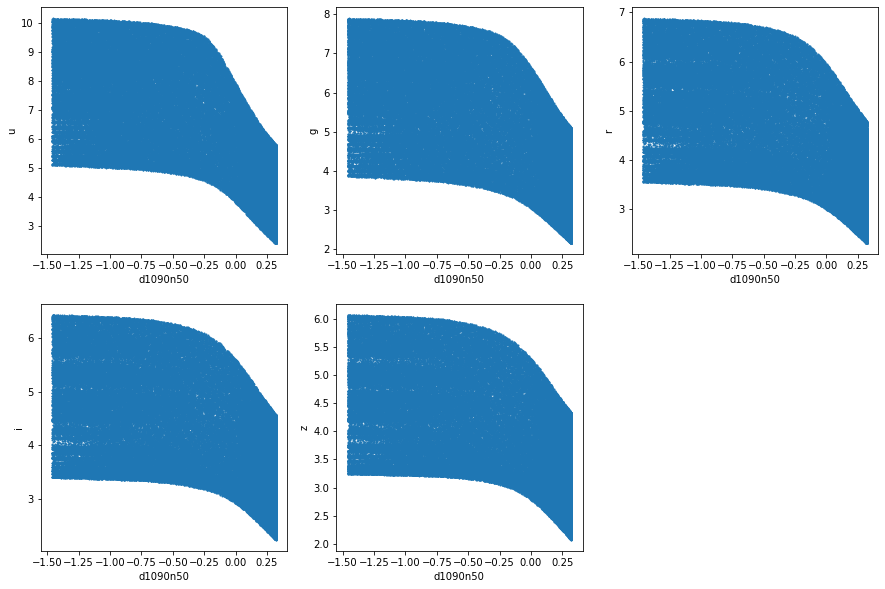

In [6]:
fig_res_tot_mag=f_plt.idx_resol(d1090n50,mag_u,mag_g, mag_r, mag_i, mag_z, par_name='d1090n50', idx_name=['u', 'g', 'r', 'i', 'z'], figsize=(15,10))

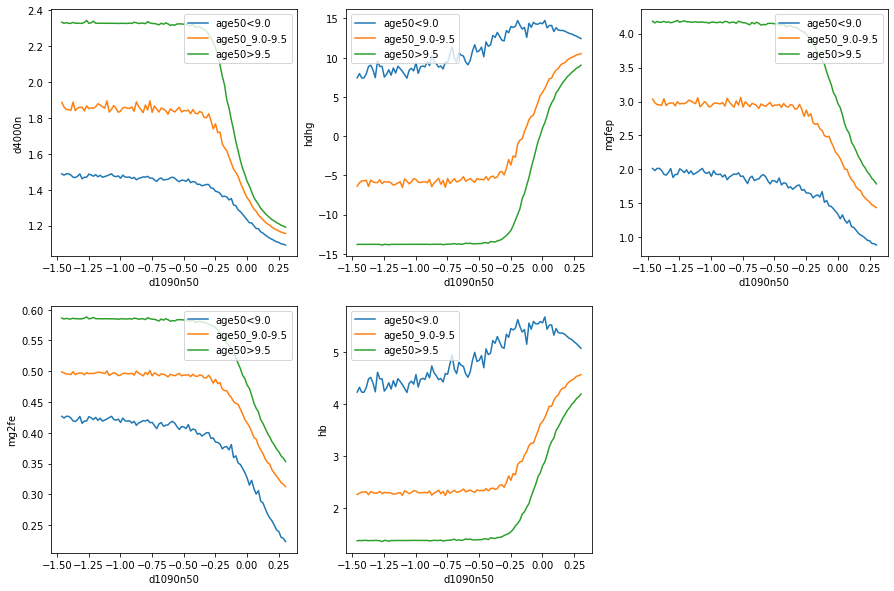

In [7]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol3_idx=f_plt.idx_resol_stat4(d1090n50,idx_sel1,idx_sel2,idx_sel3,d4000n,hdhg, mgfep, mg2fe, Hb, x_name='d1090n50',par_name=['age50<9.0','age50_9.0-9.5','age50>9.5'], idx_name=['d4000n', 'hdhg', 'mgfep', 'mg2fe', 'hb'],bins=100, figsize=(15,10))

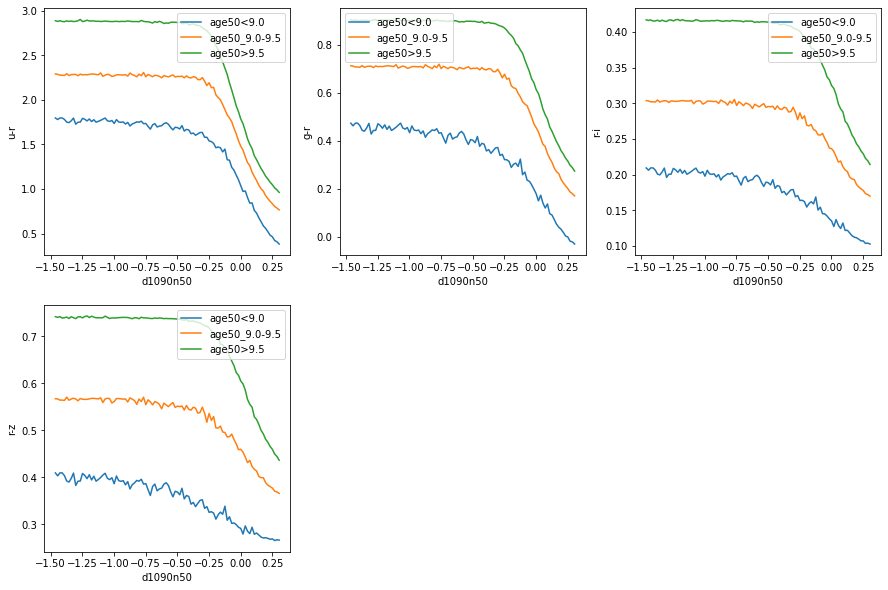

In [8]:
idx_sel1=(np.log10(age50) <9.0) 
idx_sel2=(np.log10(age50) < 9.5) & (np.log10(age50) >9.0)
idx_sel3=(np.log10(age50) >9.5) 

fig_resol_col=f_plt.idx_resol_stat4col(d1090n50,idx_sel1,idx_sel2,idx_sel3,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z,figsize=(15,10), bins=100)

d1090n50 limit: -0.50048828125


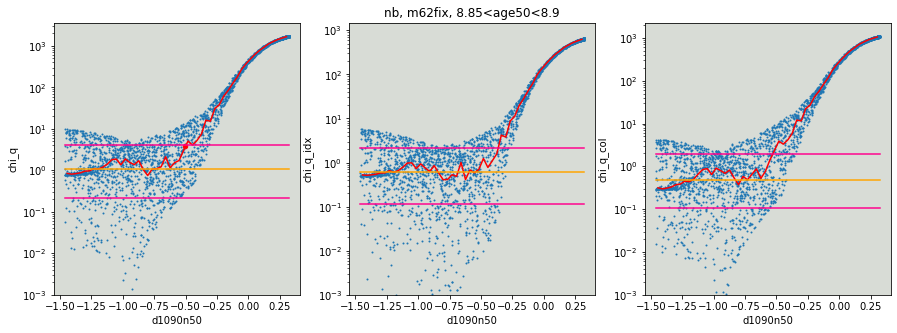

In [9]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<8.9)& (np.log10(age50)>8.85))
idx_sel=((np.log10(age50)<8.9)& (np.log10(age50)>8.85))
fig_9091tot, t_res9091=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, 8.85<age50<8.9', ylim=[0.001,None], toll=0.01)

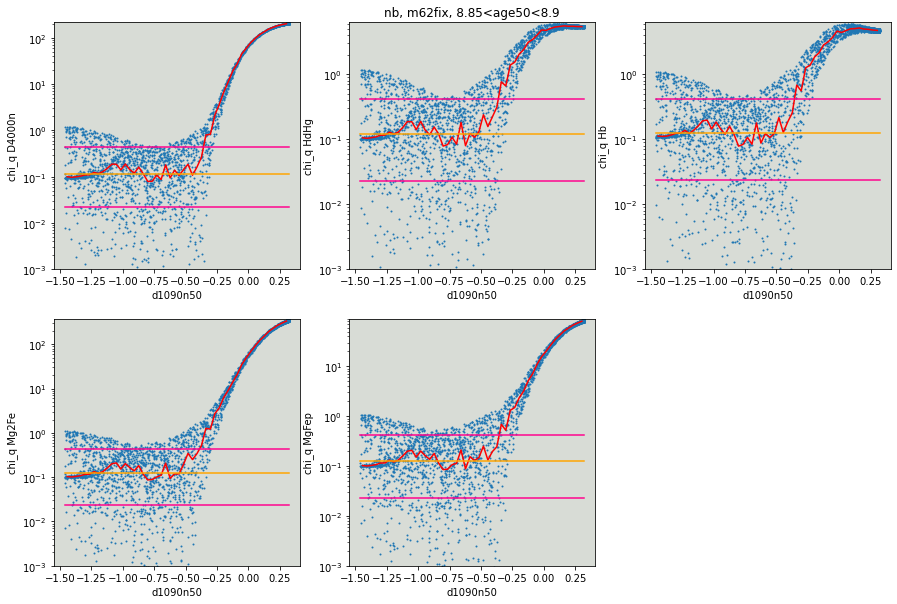

In [10]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<8.9)& (np.log10(age50)>8.85))
idx_sel=((np.log10(age50)<8.9)& (np.log10(age50)>8.85))
fig_9091idx=f_plt.chi_q_comp_idx(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 8.85<age50<8.9', ylim=[0.001,None])

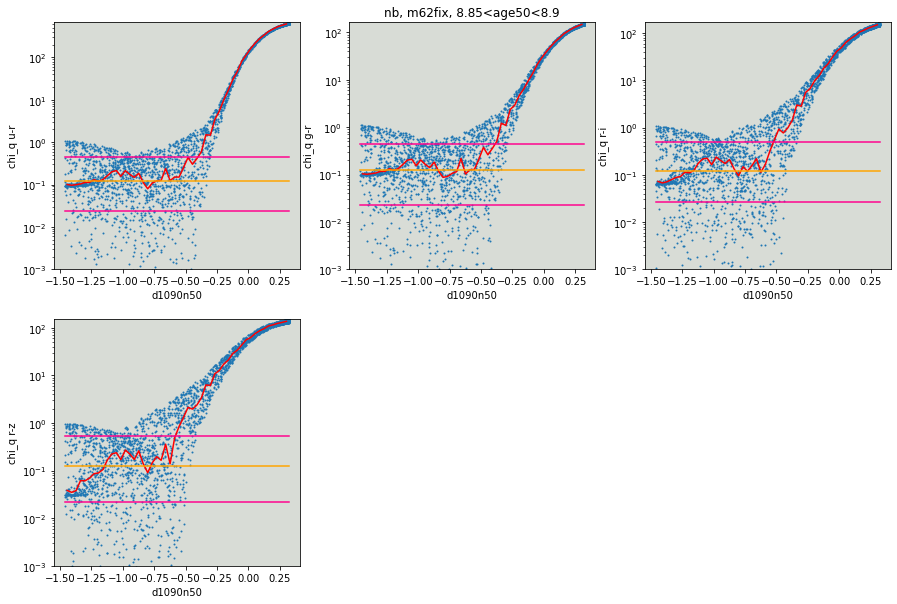

In [11]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<8.9)& (np.log10(age50)>8.85))
idx_sel=((np.log10(age50)<8.9)& (np.log10(age50)>8.85))
fig_9091col=f_plt.chi_q_comp_col(d1090n50,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 8.85<age50<8.9', ylim=[0.001,None])

d1090n50 limit: -0.39111328125


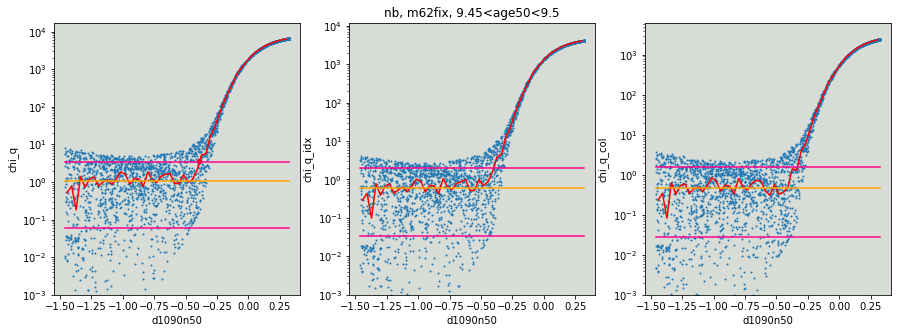

In [12]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9495tot, t_res9495=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, 9.45<age50<9.5', ylim=[0.001,None], toll=0.01)

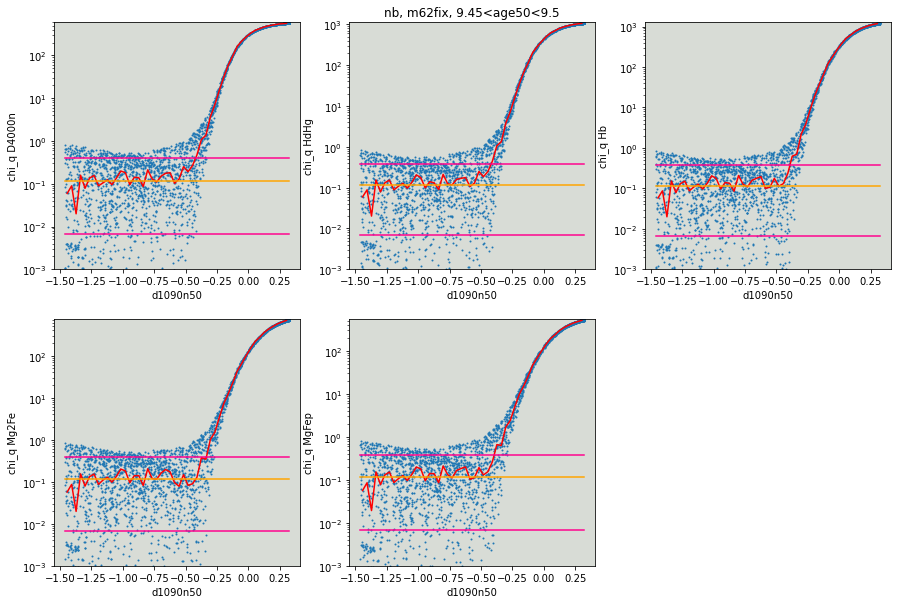

In [13]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9495idx=f_plt.chi_q_comp_idx(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.45<age50<9.5', ylim=[0.001,None])

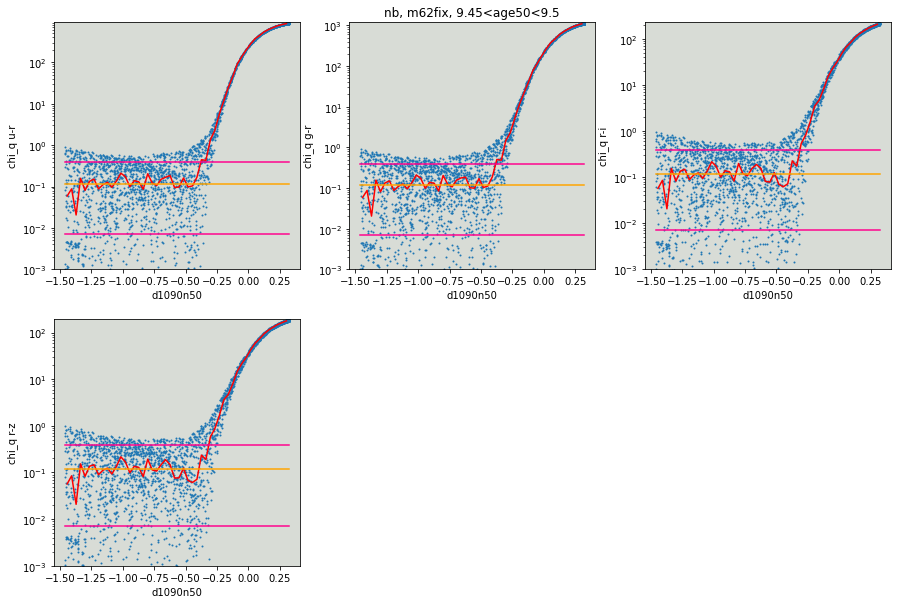

In [14]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.5)& (np.log10(age50)>9.45))
idx_sel=((np.log10(age50)<9.5)& (np.log10(age50)>9.45))
fig_9495col=f_plt.chi_q_comp_col(d1090n50,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.45<age50<9.5', ylim=[0.001,None])

d1090n50 limit: -0.54833984375


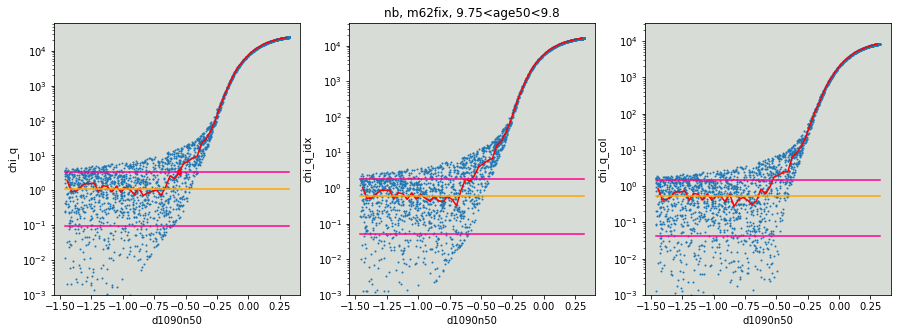

In [15]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.8)& (np.log10(age50)>9.75))
idx_sel=((np.log10(age50)<9.8)& (np.log10(age50)>9.75))
fig_9798tot, t_res9798=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, 9.75<age50<9.8', ylim=[0.001,None], toll=0.01)

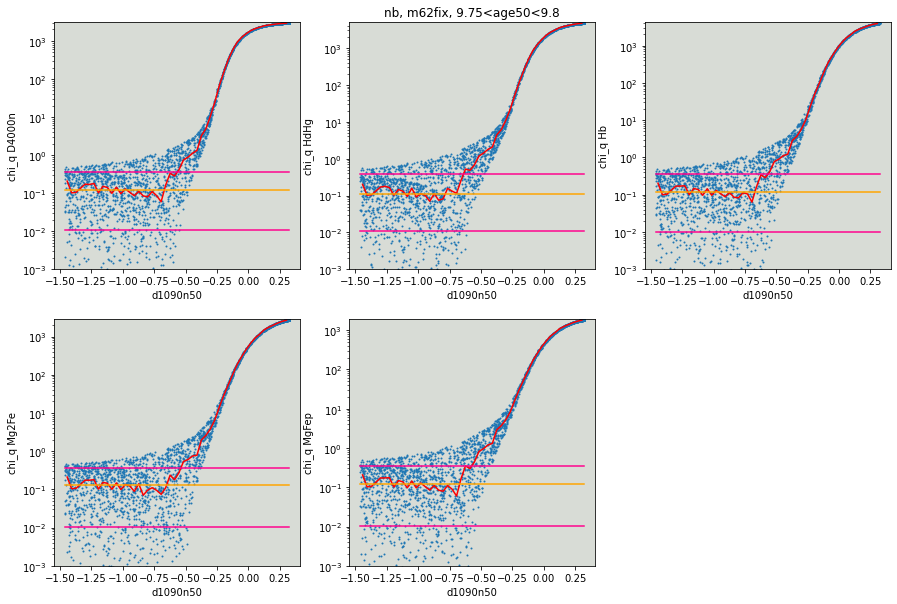

In [16]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.8)& (np.log10(age50)>9.75))
idx_sel=((np.log10(age50)<9.8)& (np.log10(age50)>9.75))
fig_9798idx=f_plt.chi_q_comp_idx(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.75<age50<9.8', ylim=[0.001,None])

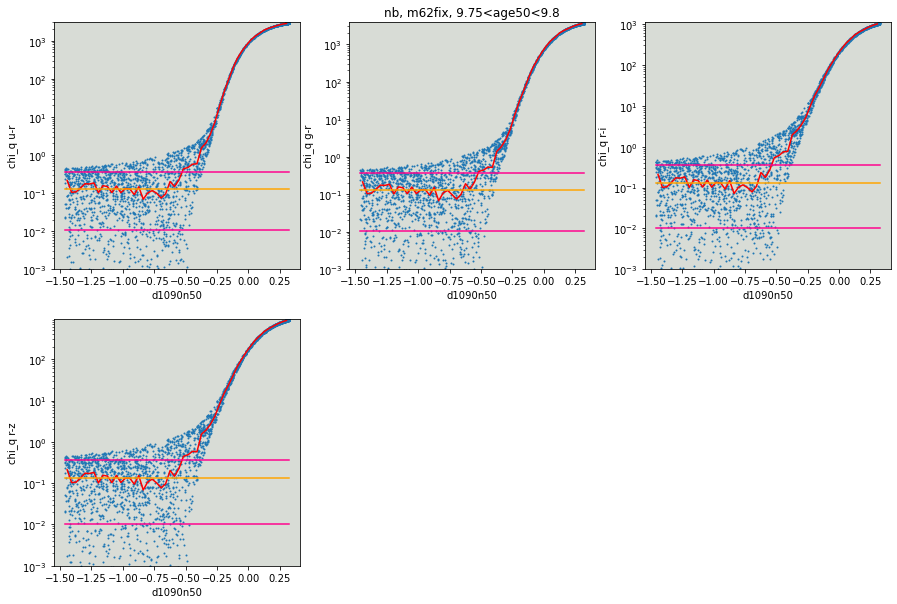

In [17]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.8)& (np.log10(age50)>9.75))
idx_sel=((np.log10(age50)<9.8)& (np.log10(age50)>9.75))
fig_9798col=f_plt.chi_q_comp_col(d1090n50,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,10), title='nb, m62fix, 9.75<age50<9.8', ylim=[0.001,None])

In [18]:
bins=40
bin_age50=np.histogram(np.log10(age50), bins=bins)[1]

In [19]:
np.size(bin_age50)

41

In [20]:
t_res=np.array([0.0]*bins)

In [21]:
for i in range(8, 39):
    idx_ref=((d1090n50<-0.75)&(np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
    idx_sel=((np.log10(age50)<bin_age50[i+1])& (np.log10(age50)>bin_age50[i]))
    print('age50 bin:', bin_age50[i],'-', bin_age50[i+1])
    t_res[i]=f_plt.chi_q_num(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref, toll=0.1, xmin=-1.0)
    print('')

age50 bin: 8.607064 - 8.65967
d1090n50 limit: -0.71875

age50 bin: 8.65967 - 8.712275
d1090n50 limit: -0.59375

age50 bin: 8.712275 - 8.76488
d1090n50 limit: -0.46875

age50 bin: 8.76488 - 8.817486
d1090n50 limit: -0.40625

age50 bin: 8.817486 - 8.8700905
d1090n50 limit: -0.40625

age50 bin: 8.8700905 - 8.922696
d1090n50 limit: -0.46875

age50 bin: 8.922696 - 8.975302
d1090n50 limit: -0.53125

age50 bin: 8.975302 - 9.027906
d1090n50 limit: -0.46875

age50 bin: 9.027906 - 9.080512
d1090n50 limit: -0.53125

age50 bin: 9.080512 - 9.133118
d1090n50 limit: -0.59375

age50 bin: 9.133118 - 9.185722
d1090n50 limit: -0.46875

age50 bin: 9.185722 - 9.238328
d1090n50 limit: -0.53125

age50 bin: 9.238328 - 9.290934
d1090n50 limit: -0.71875

age50 bin: 9.290934 - 9.343538
d1090n50 limit: -0.40625

age50 bin: 9.343538 - 9.396144
d1090n50 limit: -0.53125

age50 bin: 9.396144 - 9.44875
d1090n50 limit: -0.46875

age50 bin: 9.44875 - 9.501354
d1090n50 limit: -0.40625

age50 bin: 9.501354 - 9.55396
d1090

d1090n50 limit: -0.79296875


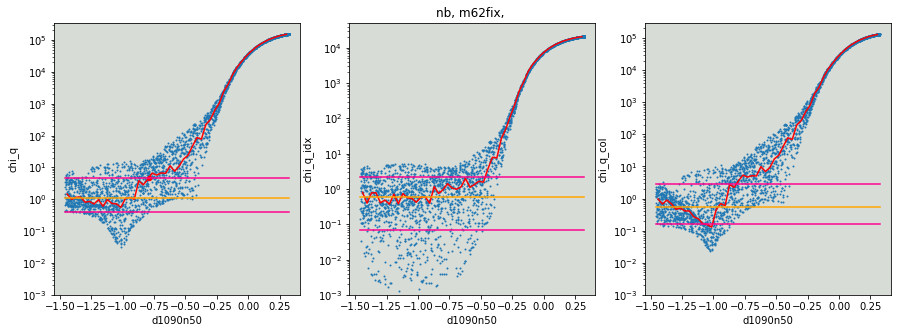

In [22]:
idx_ref=((d1090n50<-0.75)&(np.log10(age50)<9.65917)& (np.log10(age50)>9.606565))
idx_sel=((np.log10(age50)<9.65917)& (np.log10(age50)>9.606565))
fig, t_res_val=f_plt.chi_q(d1090n50,d4000n,hdhg,Hb,mg2fe,mgfep,mag_u-mag_r,mag_g-mag_r, mag_r-mag_i, mag_r-mag_z, idx_sel,idx_ref,figsize=(15,5), title='nb, m62fix, ', ylim=[0.001,None],xmin=-1.0, toll=0.01)

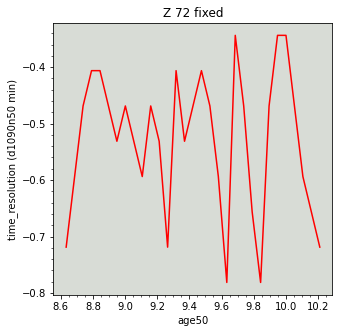

In [23]:
age50_binned=[0.0]*bins
for i in range(0, bins):
    age50_binned[i]=(bin_age50[i]+bin_age50[i+1])/2.0
    
t_res_new=t_res[8:39]
age50_binned_new=age50_binned[8:39]

fig, axs=plt.subplots(figsize=(5,5))
axs.plot(age50_binned_new, t_res_new, color='red')
axs.set_xlabel('age50')
axs.set_ylabel('time_resolution (d1090n50 min)')
axs.set_title('Z '+z+' fixed')
axs.minorticks_on()
axs.set_facecolor('#d8dcd6')

In [24]:
z32=-1.69897
z42=-0.69897
z52=-0.39794
z62=0.0
z72=0.39794

In [25]:
Z=[z32,z42,z52,z62,z72]

In [26]:
x,y=np.meshgrid(bin_age50, Z)

In [34]:
np.shape(y)

(5, 41)

In [27]:
time_res_file=work_dir+'Time_resol_Zfix.fits'
list_t=fits.open(time_res_file)

In [28]:
list_t.info()

Filename: /home/edoardo/Desktop/TESI/models/Sandage_v4.1_Zfix_noburst_bc03MILES_100k/Time_resol_Zfix.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     18   40R x 5C   [D, D, D, D, D]   


In [49]:
table_t_res=(list_t[1].data)

In [53]:
t_32=table_t_res['Log_d1090n50_min_z32']
t_42=table_t_res['Log_d1090n50_min_z42']
t_52=table_t_res['Log_d1090n50_min_z52']
t_62=table_t_res['Log_d1090n50_min_z62']
t_72=table_t_res['Log_d1090n50_min_z72']

<ipython-input-54-7cb9f0ac0b4e>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,[t_32, t_42, t_52, t_62, t_72])


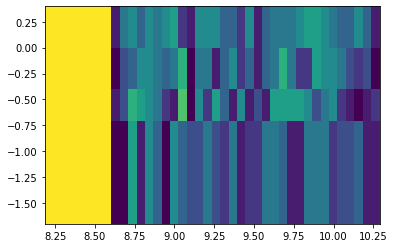

In [54]:
plt.pcolormesh(x,y,[t_32, t_42, t_52, t_62, t_72])

<ipython-input-56-f946d9f89c35>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax.pcolormesh(x, y, [t_32, t_42, t_52, t_62, t_72],cmap=cm.Spectral)


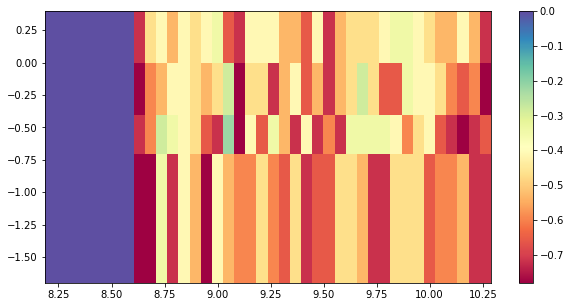

In [56]:
fig, ax=plt.subplots(figsize=(10,5))
im=ax.pcolormesh(x, y, [t_32, t_42, t_52, t_62, t_72],cmap=cm.Spectral)
fig.colorbar(im, ax=ax)
ax.set_facecolor('#d8dcd6')